In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")

In [2]:
data = pd.merge(transactions, customers, on="CustomerID", how="left")

In [3]:
#Aggregate features for each customer
customer_features = data.groupby('CustomerID').agg({'TotalValue': 'sum','TransactionID': 'count','Region': lambda x: x.mode()[0],}).reset_index()

In [4]:
#Encode categorical data (Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], prefix='Region')

In [5]:
#Normalize the features
scaler = StandardScaler()
numeric_cols = ['TotalValue', 'TransactionID']
customer_features[numeric_cols] = scaler.fit_transform(customer_features[numeric_cols])

In [6]:
#Select features for clustering
features = customer_features.drop(columns=['CustomerID'])

In [7]:
#Perform clustering with KMeans
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features)

In [8]:
#Calculate DB Index
db_index = davies_bouldin_score(features, customer_features['Cluster'])

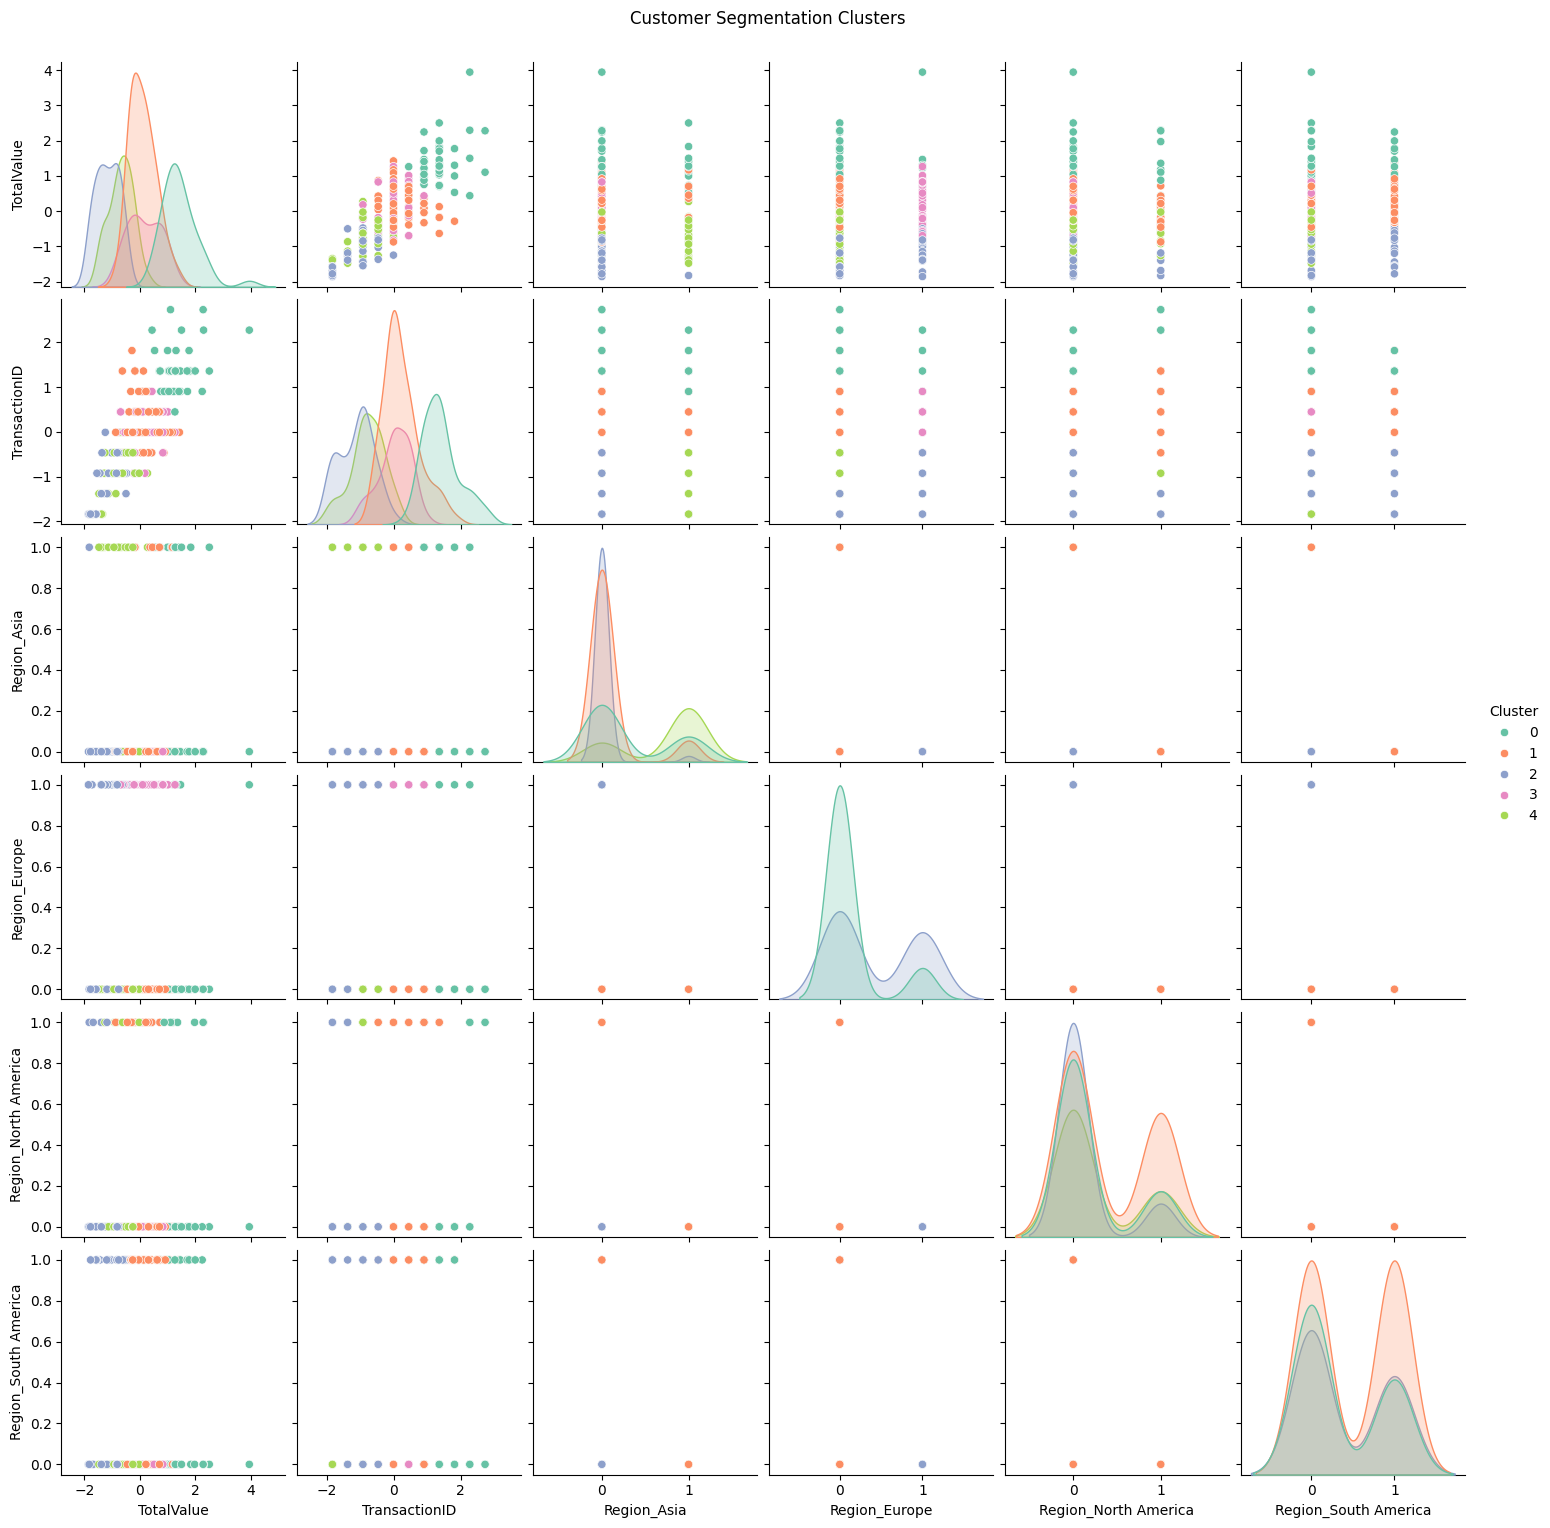

In [9]:
#Visualize the clusters using pairplot
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='Set2')
plt.suptitle("Customer Segmentation Clusters", y=1.02)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16484\3226030955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_features, palette='Set3')


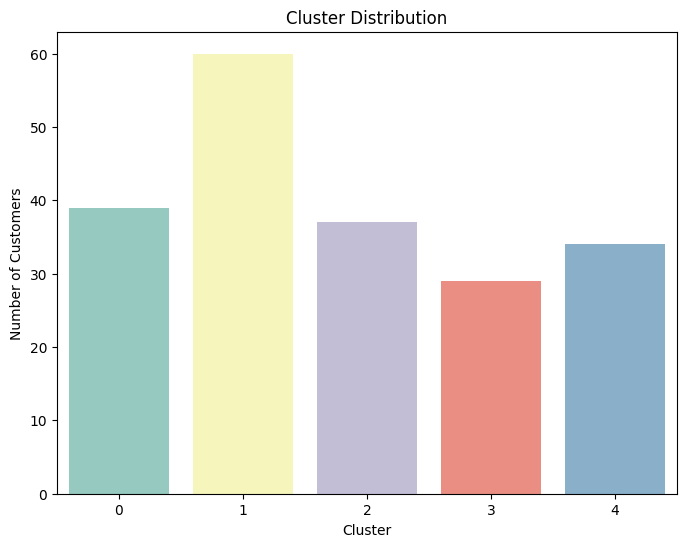

In [10]:
#Visualize the cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=customer_features, palette='Set3')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

In [12]:
print(f"Number of Clusters: {optimal_clusters}")
print(f"DB Index: {db_index:.3f}")

Number of Clusters: 5
DB Index: 1.475
